In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras as ke
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

#importing NMIST data
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
#splitting into train/validation data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


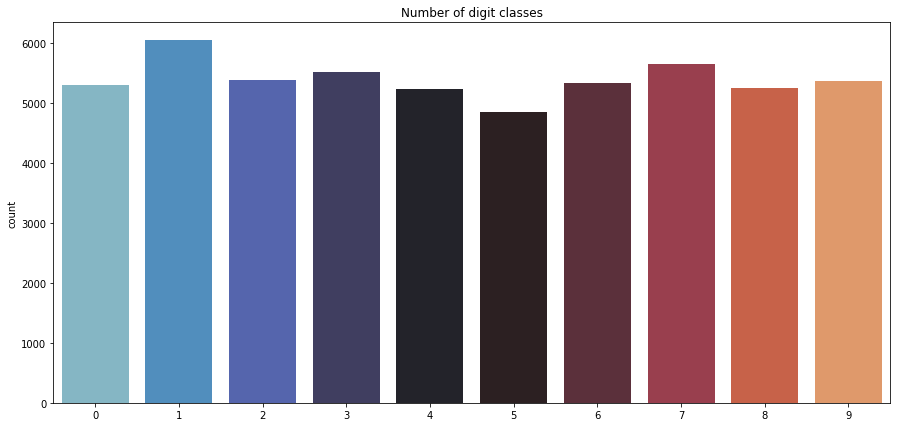

In [46]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
plt.show()

x_train shape (54000, 28, 28)
x_test shape (6000, 28, 28)
y_train shape (54000,)
y-test shape (6000,)


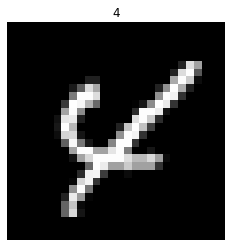

In [47]:
print("x_train shape",X_train.shape)
print("x_test shape", X_val.shape)
print("y_train shape", Y_train.shape)
print("y-test shape", Y_val.shape)

x_img_arr = X_train[0,:]
plt.imshow(x_img_arr,cmap="gray")
plt.title(f'{Y_train[0]}')
plt.axis("off")
plt.show()

In [48]:
X_train = X_train/255.0
X_test = X_test/255.0

In [49]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [50]:
Y_train = to_categorical(Y_train, num_classes = 10)
Y_test = to_categorical(Y_test, num_classes = 10)

In [52]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [53]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', 
                 activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))#regularize the data to fit for all the extreme but not too many
#LOWERS THE DEMENTIONALITY TO ALLOW FOR FITTING TO OTHER MODELS
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))



In [58]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss='categorical_crossentropy', metrics=["accuracy"])

In [59]:
epochs = 10 #number of times it goes through iterations
batch_size = 250

In [60]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

datagen.fit(X_train)


In [61]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test), steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
216/216 [==============================] - 53s 215ms/step - loss: 1.4005 - accuracy: 0.5275 - val_loss: 0.1394 - val_accuracy: 0.9597
Epoch 2/10
216/216 [==============================] - 45s 210ms/step - loss: 0.3777 - accuracy: 0.8817 - val_loss: 0.0808 - val_accuracy: 0.9746
Epoch 3/10
216/216 [==============================] - 45s 210ms/step - loss: 0.2636 - accuracy: 0.9176 - val_loss: 0.0633 - val_accuracy: 0.9801
Epoch 4/10
216/216 [==============================] - 46s 211ms/step - loss: 0.2231 - accuracy: 0.9309 - val_loss: 0.0520 - val_accuracy: 0.9833
Epoch 5/10
216/216 [==============================] - 46s 211ms/step - loss: 0.1947 - accuracy: 0.9402 - val_loss: 0.0447 - val_accuracy: 0.9841
Epoch 6/10
216/216 [==============================] - 45s 210ms/step - loss: 0.1752 - accuracy: 0.9460 - val_loss: 0.0418 - val_accuracy: 0.9857
Epoch 7/10
216/216 [==============================] - 46s 212ms/step - loss: 0.1682 - accuracy: 0.9488 - val_loss: 0.0379 - val_ac

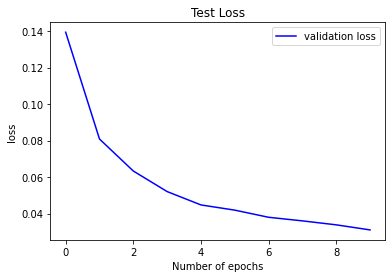

In [63]:
plt.plot(history.history['val_loss'], color='b', label='validation loss')
plt.title("Test Loss")
plt.xlabel("Number of epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

[[ 975    0    0    0    0    0    3    1    1    0]
 [   0 1129    2    0    0    0    2    2    0    0]
 [   1    0 1016    4    0    0    0    8    3    0]
 [   0    0    0 1002    0    3    0    3    2    0]
 [   0    0    0    0  975    0    0    0    0    7]
 [   1    0    0    6    0  882    2    0    1    0]
 [   2    3    0    0    0    2  949    0    2    0]
 [   1    2    8    0    0    0    0 1015    2    0]
 [   1    2    2    1    1    1    1    2  960    3]
 [   0    2    0    1    5    3    0    4    4  990]]


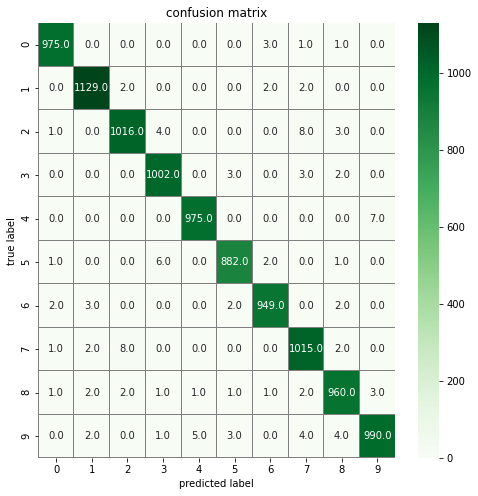

In [70]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(Y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax=plt.subplots(figsize=(8, 8))
print(confusion_mtx)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens",linecolor="gray", fmt='.1f',ax=ax)
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.title("confusion matrix")
plt.show()